
PYTHON HOME ASSIGNMENT:
## <u>Neural Incentives: Visualizing the Brain's Reward Anticipation Systems</u> ##

Name: _Karishma Kalesh Kallingapuram_\
Date of Completion: _30.11.2024_\
Link to Data: https://neurosynth.org/analyses/terms/reward%20anticipation/


<u>Code that allows to locate MRI data automatically based on file extensions and file names and prints out the file path :</u>

In [5]:
import os

def locate_mri_data(root_dir, extensions=None, file_names=None): #Defining a function to locate MRI data based on file extensions and/or specific file names.
    """
    Automatically locate MRI data based on file extensions and/or specific file names.
    Parameters:
    - root_dir (str): The root directory to search for MRI data.
    - extensions (list): A list of (MRI) file extensions to search for (e.g., ['.nii', '.nii.gz']).
    - file_names (list): A list of specific file names to search for (e.g., ['anat.nii', 'func.nii.gz']).
    Returns:
    - list: A list of file paths that match the specified extensions and/or file names.
    """
    extensions = extensions or ['.nii', '.nii.gz', '.dcm']  # Default MRI file extensions
    return [
        os.path.join(dirpath, filename) #This function joins one or more path components together.
        for dirpath, _, filenames in os.walk(root_dir)
        for filename in filenames
        if any(filename.lower().endswith(ext) for ext in extensions) or (file_names and filename in file_names)
    ]

# To make this interactive, we can use ' root_directory= input()' to ask user to provide the directory path as input.
root_directory = r'C:\Users\MYBOOK\OneDrive\Desktop\PROGRAMMING FOR PSYCHOLOGISTS\home_assignment' #Here I have directly provided the path of the directory where the MRI files are stored in my system in the code itself.
# An if function to check if the root directory is set or not.
if root_directory:
    mri_files = locate_mri_data(
        root_dir=root_directory,
        extensions=['.nii', '.nii.gz'],
        file_names=['anat.nii.gz', 'reward.nii.gz']
    )
    if mri_files:
        print("Found MRI files:", mri_files)
    else:
        print("No MRI files found.")
else:
    print("Root directory is not set.")

Found MRI files: ['C:\\Users\\MYBOOK\\OneDrive\\Desktop\\PROGRAMMING FOR PSYCHOLOGISTS\\home_assignment\\data\\anatomical.nii.gz', 'C:\\Users\\MYBOOK\\OneDrive\\Desktop\\PROGRAMMING FOR PSYCHOLOGISTS\\home_assignment\\data\\reward anticipation_uniformity-test_z_FDR_0.01.nii.gz']


<u>Loading data from directory to be used for visualization in Step 3, using the nibabel package: </u>

In [6]:
import os
import nibabel as nib

# Loading the NIfTI files
anatomical_file = mri_files[0]  # Load the first NIfTI file which is the anatomical data
functional_file = mri_files[1]  # Load the second NIfTI file which is the functional data

# Obtaining data from the NIfTI files
anatomical_data = nib.load(anatomical_file).get_fdata()
functional_data = nib.load(functional_file).get_fdata()

# Printing the shapes of the loaded data
print(f"Shape of anatomical file: {anatomical_data.shape}")
print(f"Shape of functional file: {functional_data.shape}")


Shape of anatomical file: (91, 109, 91)
Shape of functional file: (91, 109, 91)


<u>Visualizing functional data on top of the anatomical scan using nilearn’s plot_stat_map function:</u>

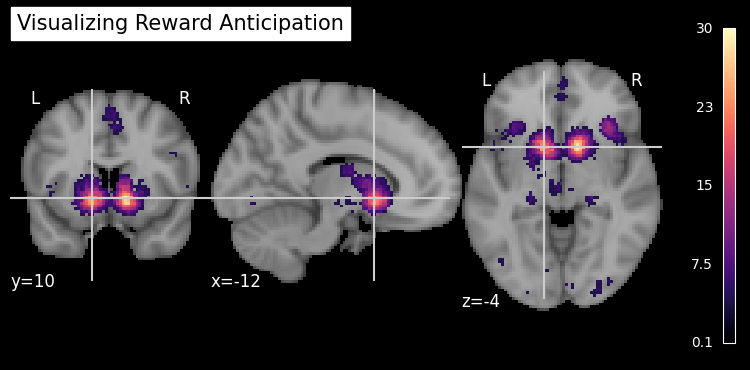

In [7]:
from nilearn.plotting import plot_stat_map
import matplotlib.pyplot as plt
import nibabel as nib

# Plotting the functional data on top of the anatomical data using Nilearn's plot_stat_map function
figure = plot_stat_map(nib.Nifti1Image(functional_data, nib.load(functional_file).affine),
                        bg_img=nib.Nifti1Image(anatomical_data, nib.load(anatomical_file).affine), cut_coords=(-12, 10, -4),
                        title="Visualizing Reward Anticipation", cmap='magma', threshold=0.1)

plt.show()


<u>Plotting a Histogram of the Values in the Functional Data File:</u> 

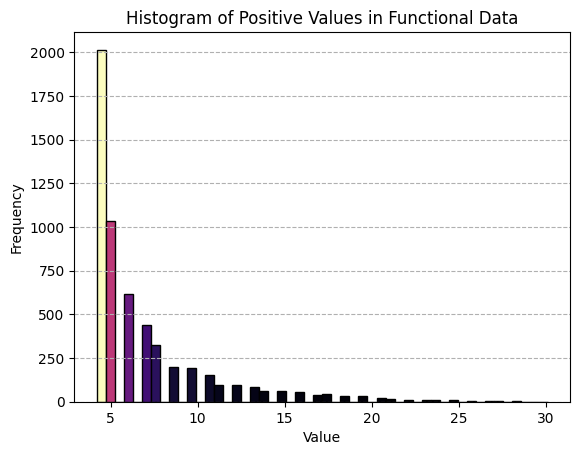

The positive value with the highest frequency is 4.221209472691532 with a count of 2015


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
from matplotlib import colors

# Loading the functional data using nibabel
functional_data = nib.load(functional_file).get_fdata()

# Extracting the positive values from the functional data
positive_values = functional_data[functional_data > 0]
data_min = positive_values.min()
data_max = positive_values.max()

# Plotting a histogram of the positive values
n, bins, patches = plt.hist(positive_values.ravel(), bins=50, range=(data_min, data_max), edgecolor='black')

# Normalize the data to 0..1 for the full range of the colormap
fracs = n / n.max()
norm = colors.Normalize(fracs.min(), fracs.max())

# Set the color of each patch accordingly using the 'magma' colormap to match the brain activation plot above
cmap = plt.get_cmap('magma')
for thisfrac, thispatch in zip(fracs, patches):
    color = cmap(norm(thisfrac))
    thispatch.set_facecolor(color)

plt.title('Histogram of Positive Values in Functional Data')
plt.grid(axis='y', linestyle='--')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Just checking whether the positive value with the highest frequency from the functional data matches the value plotted in the histogram
unique, counts = np.unique(positive_values, return_counts=True)
max_count_index = np.argmax(counts)
value_with_max_frequency = unique[max_count_index]

print(f"The positive value with the highest frequency is {value_with_max_frequency} with a count of {counts[max_count_index]}")

![Michael Scott I Tried](https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExa2EyNDd6eXNsM2YwZm1nbDdhOW5xOWc4MnJzMGlwZm14ams4bWNtaCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/KSKvdT1YGCpUIonvSq/giphy.webp)  
## THANK YOU :) 

